In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn

In [2]:
from torch.optim.lr_scheduler import _LRScheduler
import torch
class CosineAnnealingLRRestart(_LRScheduler):
    def __init__(self, optimizer, T_max, T_mul, eta_min=0, last_epoch=-1, verbose=False):
        self.optimizer = optimizer
        self.T_max = T_max
        self.T_mul = T_mul
        self.eta_min = eta_min
        self.last_epoch = last_epoch
        self.verbose = verbose
        self.scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 
               T_max=self.T_max, eta_min=self.eta_min, last_epoch=self.last_epoch, verbose=self.verbose)
        
        
    def get_lr(self):
        return self.scheduler.get_lr()
    
    def step(self, step=None):
        self.scheduler.step()
        if self.optimizer.param_groups[0]['lr'] == self.eta_min:
            self.T_max *= self.T_mul
            self.scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 
               T_max=self.T_max, eta_min=self.eta_min, last_epoch=self.last_epoch, verbose=self.verbose)

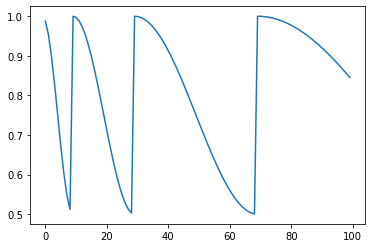

In [3]:
model = nn.Sequential(nn.Conv2d(1,20,5))
optimizer = torch.optim.Adam(model.parameters(), lr=1)

T_mul = 2
T_max = 10
eta_min = .5
scheduler = CosineAnnealingLRRestart(optimizer, T_max=T_max, T_mul=T_mul, eta_min=eta_min)
lrs = []
for i in range(100):
    optimizer.step()
    scheduler.step()
    lr = optimizer.param_groups[0]['lr']
    lrs.append(lr)
   
plt.plot(lrs, '-')